# Arsh Misra

# Part A

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#setting up our variables
target_feature = 'testscr'
explanatory_vars = 'elpct', 'avginc', 'calwpct'

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv')
#implement pipeline'
df.head()

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


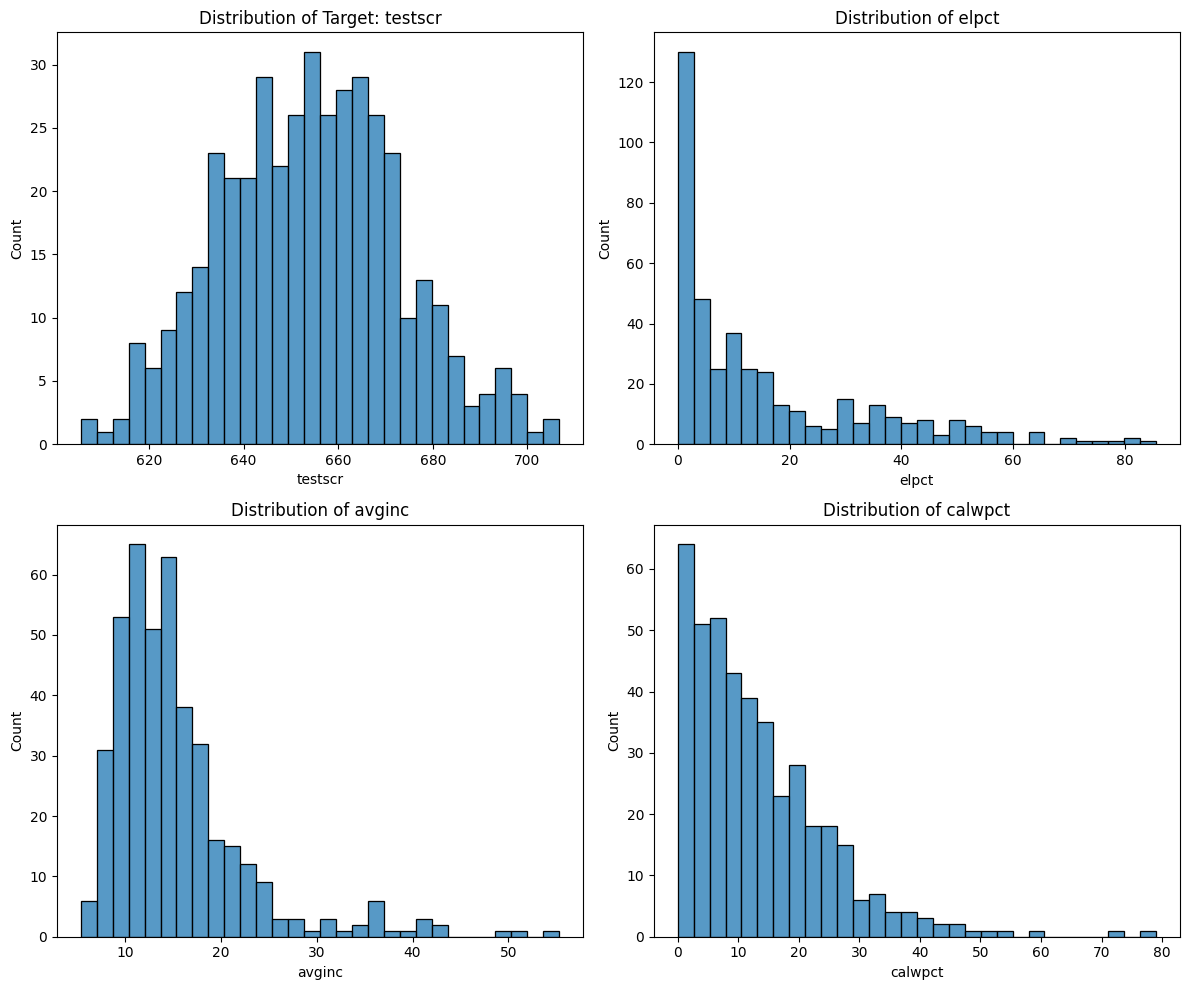

In [ ]:
#1. Visualize the univariate distribution of the target feature and each of the three
#continuous explanatory variables you think are likely to have a relationship with the target feature

# Visualize the target and explanatory variables together in a grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Target variable plot
sns.histplot(df[target_feature], bins=30, ax=axes[0, 0])
axes[0, 0].set_title(f'Distribution of Target: {target_feature}')

# Explanatory variables plots
for i, var in enumerate(explanatory_vars):
    sns.histplot(df[var], bins=30, ax=axes[(i+1)//2, (i+1)%2])
    axes[(i+1)//2, (i+1)%2].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()


Testscr: appears to have an almost normal distribution. This could be because test scores are influenced by small, independent factors like the central limit theorem suggests.
elpct: right skew (higher percentage of english speakers in schools on average)
avginc: right skew (most districts receive a certain standard budget compared to extremely wealthy or extremely poor districts.
calpwct: right skew (usually not a large percentage throughout the state but does fluctuate between certain percentage levels)

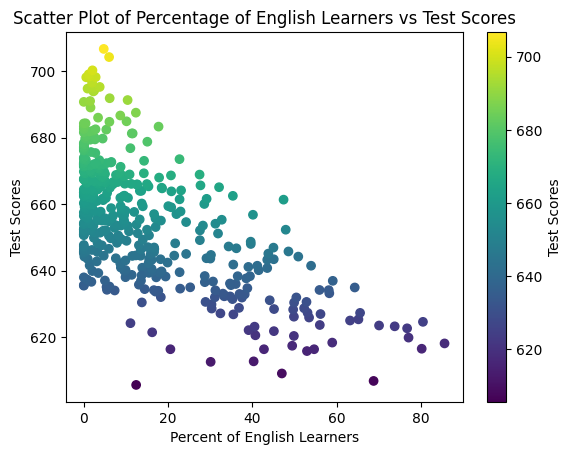

In [ ]:
#2. Visualize the dependency of each explanatory variable on the target feature.
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'teachers' and 'testscr' columns
# Use a colormap for continuous color mapping
plt.scatter(df['elpct'], df['testscr'], c=df['testscr'], cmap='viridis')
plt.colorbar(label='Test Scores')  # Optional: Add color bar for reference
plt.xlabel('Percent of English Learners')  # Label for x-axis
plt.ylabel('Test Scores')          # Label for y-axis
plt.title('Scatter Plot of Percentage of English Learners vs Test Scores')  # Title of the plot
plt.show()


Shows a moderate/weak downward trend that indicates that those who are learning english are likely to have lower test scores. This makes sense because they may struggle to understand questions in exams, learning material, etc.

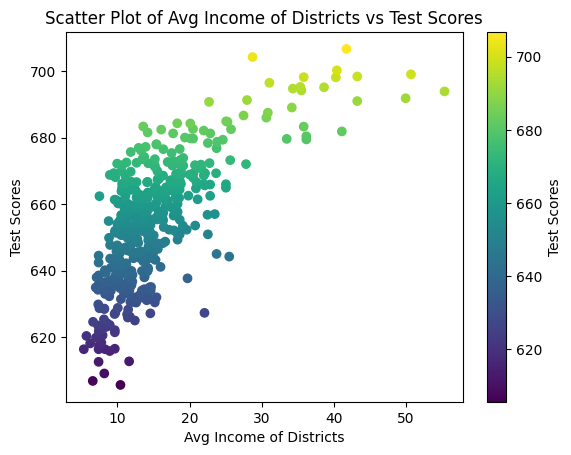

In [ ]:
plt.scatter(df['avginc'], df['testscr'], c=df['testscr'], cmap='viridis')
plt.colorbar(label='Test Scores')  # Optional: Add color bar for reference
plt.xlabel('Avg Income of Districts')  # Label for x-axis
plt.ylabel('Test Scores')          # Label for y-axis
plt.title('Scatter Plot of Avg Income of Districts vs Test Scores')  # Title of the plot
plt.show()

Appears to show a strong positive correlation between the average income of districts and test scores. Naturally, this makes sense since wealthier districts can afford to spend more money on their students.

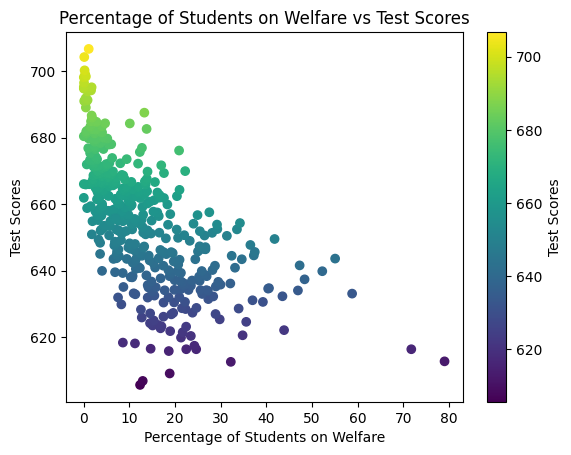

In [ ]:
plt.scatter(df['calwpct'], df['testscr'], c=df['testscr'], cmap='viridis')
plt.colorbar(label='Test Scores')  # Optional: Add color bar for reference
plt.xlabel('Percentage of Students on Welfare')  # Label for x-axis
plt.ylabel('Test Scores')          # Label for y-axis
plt.title('Percentage of Students on Welfare vs Test Scores')  # Title of the plot
plt.show()

This shows a strong negative trend between the percentage of students on welfare vs test scores. This makes sense because students who can't afford proper meals may struggle to perform in examinations and school in general.

In [ ]:
#3. Split the data into training and test sets, build models that evaluate the relationship between all available
#quantitative x variables in the California test dataset and target variables. Evaluate KNN (for regression)
#Linear Regression (OLS), Ridge and Lasso using Cross Validation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean

# Identify features and target variable
X = df[['elpct', 'avginc', 'calwpct', 'enrltot',	'teachers',	'calwpct',	'mealpct',	'computer',
'compstu',	'expnstu',	'str'	]]  # Replace with your actual feature columns
y = df['testscr']  # Replace with your actual target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create an instance of the KNN regressor
knn = KNeighborsRegressor(n_neighbors=3)  # You can adjust n_neighbors as needed

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

#kfold cross-validation
kfold = KFold(n_splits=5)

print("KFold:\n{}".format(
mean(cross_val_score(KNeighborsRegressor(n_neighbors=3), X_train, y_train, cv=kfold))))
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print(f'Training Score (R^2): {train_score:.2f}')
print(f'Test Score (R^2): {test_score:.2f}')

KFold:
-0.20365875889840654
Training Score (R^2): 0.44
Test Score (R^2): 0.05


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

#The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
# attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

print(X_train.columns)  #column names to help identify output
#combine some text with a vector of beta coefficients that are converted to string data to enable it to be printed
print("\nlr.coef_: "+str(lr.coef_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
#print mean of the 10 values of r2 that are generated
print(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring="r2")))

Index(['elpct', 'avginc', 'calwpct', 'enrltot', 'teachers', 'calwpct',
       'mealpct', 'computer', 'compstu', 'expnstu', 'str'],
      dtype='object')

lr.coef_: [-1.97462843e-01  5.17180694e-01 -5.25611159e-02  2.37299343e-04
 -9.68465212e-03 -5.25611159e-02 -3.63632211e-01  2.23981150e-03
 -1.50110373e+00  1.87297506e-03 -3.68530746e-01]
Training set score: 0.81
Test set score: 0.81
0.7793254938876509


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print(np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10, scoring="r2")))
print("\ridge.coef_: {}".format(ridge.coef_))

Training set score: 0.81
Test set score: 0.81
0.7804641665741727
idge.coef_: [-1.96933197e-01  5.16732010e-01 -5.22590842e-02  2.16638850e-04
 -8.94391928e-03 -5.22590842e-02 -3.63984063e-01  2.10679102e-03
 -7.07171293e-01  1.86261865e-03 -3.61968654e-01]


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print("\nlasso.coef_: {}".format(lasso.coef_))
print(np.mean(cross_val_score(Lasso(), X_train, y_train, cv=10, scoring="r2")))

Training set score: 0.80
Test set score: 0.81
Number of features used: 9

lasso.coef_: [-1.86583984e-01  4.81692017e-01 -8.57378842e-02 -3.49412942e-04
  2.48083680e-03 -3.01652658e-03 -3.79258698e-01  1.92109049e-03
  0.00000000e+00  2.48226095e-03 -0.00000000e+00]
0.7828122311477252


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.023e+01, tolerance: 1.014e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+02, tolerance: 8.856e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.072e+01, tolerance: 9.153e

Results for each model:

KNN:
Training: 0.44
Test: 0.05
K-fold: -0.204

Linear Regression:
Training: 0.81
Test: 0.81
cross-val score: 0.779

Ridge:
Training: 0.81
Test: 0.81
cross-val score: 0.780

Lasso:
Training: 0.80
Test: 0.81
cross-val score: 0.783

So we can see here that the KNN model's scores differ significantly from the rest of the models. The linear, ridge, and lasso regressions on the other hand, have nearly identical scores, ranging from 0.8 to 0.81 for the training and test scores and 0.779 to 0.783 for the cross-validation scores.

In [ ]:
#Try running your models from the previous question with and without StandardScaler. Does using StandardScaler help?

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

print(pipe.fit(X_train, y_train))
print(pipe.score(X_train, y_train))
print("KFold:\n{}".format(
mean(cross_val_score(pipe, X_train, y_train, cv=kfold))))



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])
0.8140710508310636
KFold:
0.7236298480223745


In [ ]:

pipe_2 = make_pipeline(StandardScaler(), LinearRegression())
pipe_2.fit(X_train, y_train)
pipe_2.score(X_test, y_test)

print(pipe_2.fit(X_train, y_train))
print(pipe_2.score(X_train, y_train))
print(np.mean(cross_val_score(pipe_2, X_train, y_train, cv=10, scoring="r2")))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
0.8054668980835679
0.779325493887651

lr.coef_: [-1.97462843e-01  5.17180694e-01 -5.25611159e-02  2.37299343e-04
 -9.68465212e-03 -5.25611159e-02 -3.63632211e-01  2.23981150e-03
 -1.50110373e+00  1.87297506e-03 -3.68530746e-01]


In [ ]:
pipe_3 = make_pipeline(StandardScaler(), Ridge().fit(X_train, y_train))
pipe_3.fit(X_train, y_train)
pipe_3.score(X_test, y_test)

print(pipe_3.fit(X_train, y_train))
print(pipe_3.score(X_train, y_train))
print(np.mean(cross_val_score(pipe_3, X_train, y_train, cv=10, scoring="r2")))
print("ridge.coef_: {}".format(pipe_3.named_steps['ridge'].coef_))




Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])
0.8054467256209809
0.7816019682656796
ridge.coef_: [-3.52445874  3.73883357 -0.62387067  0.07005507 -0.92575509 -0.62387067
 -9.65087573  0.94553979 -0.08141992  1.15774423 -0.63967595]


In [ ]:
pipe_4 = make_pipeline(StandardScaler(), Lasso())
pipe_4.fit(X_train, y_train)
pipe_4.score(X_test, y_test)

print(pipe_4.fit(X_train, y_train))
print(pipe_4.score(X_train, y_train))
print(np.mean(cross_val_score(pipe_4, X_train, y_train, cv=10, scoring="r2")))

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])
0.7967336421099113
0.7804804778229599


We see that after implementing StandardScaler only the KNN model significantly improves. This is probably because before using standard scaler one or more features may have been dominating the model due to the difference in scales. However, now that a single scale between 0 and 1 has been implemented across all features, it allows the model to make predictions more accurately.

As for the other models, we observe that the scores either do not change at all or actually hurt the predictive power of the model. However, this is only observed in the Lasso regression model. The scores decline from 0.81 to 0.797 for the test score and 0.780 fom 0.783 for the cross-val score.

In [ ]:

#Tune the parameters of the models where possible using GridSearchCV. Do the results improve?
from sklearn.model_selection import GridSearchCV

#refer to step name with two underscores before argument name when
#you build a parameter grid

param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))
print("KFold:\n{}".format(
mean(cross_val_score(grid, X_train, y_train, cv=kfold))))

{'kneighborsregressor__n_neighbors': 7}
0.7709770243740897
KFold:
0.727986112703866


gridsearch cv did not work for the linear regression model.

In [ ]:

# Create a pipeline that includes scaling and Ridge regression
pipeline = make_pipeline(StandardScaler(), Ridge())

# Set up the parameter grid for GridSearchCV
param_grid = {'ridge__alpha': [0.1, 1, 10, 100]}  # Adjust alpha values as needed

# Create the GridSearchCV object
grid = GridSearchCV(pipeline, param_grid, cv=10)

# Fit the model using GridSearchCV
grid.fit(X_train, y_train)

# Print the best parameters and test score
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))
print(np.mean(cross_val_score(grid, X_train, y_train, cv=10, scoring="r2")))

Best parameters: {'ridge__alpha': 10}
Test set score: 0.8043148393636088
0.7833983804141622


In [ ]:
# Create a pipeline that includes scaling and Lasso regression
pipeline_2 = make_pipeline(StandardScaler(), Lasso())

# Set up the parameter grid for GridSearchCV
param_grid = {'lasso__alpha': [0.1, 1, 10, 100]}  # Adjust alpha values as needed

# Create the GridSearchCV object
grid = GridSearchCV(pipeline_2, param_grid, cv=10)

# Fit the model using GridSearchCV
grid.fit(X_train, y_train)

# Print the best parameters and test score
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))
print(np.mean(cross_val_score(grid, X_train, y_train, cv=10, scoring="r2")))

Best parameters: {'lasso__alpha': 0.1}
Test set score: 0.8054768989504194
0.7780820685117085


We observe that by using gridsearchcv, the scores for KNN, Ridge, and Lasso do not change significantly if at all. In fact, using gridsearch for KNN actually causes the test scores to decline slightly from around 0.81 to 0.771. The cross-val score remains unchanged for the most part.

As for Ridge, the test and cross-val scores stay mostly the same with the exception of the test score declining to 0.804 from 0.805. The Lasso model is the only model that is improved by gridsearch. Its test scores increase to 0.805 from 0.797 but its cross-val score declined to 0.778.

If we compare the two best models, we see that the ridge regression with standard scaler (no gridsearch) and the lasso regression without standard scaler (no gridsearch) are the two best models (Ridge: test 0.81 and cross-val 0.782) (Lasso: test 0.81 and cross-val 0.783). The coefficients for both models are:

Ridge: [-3.52445874  3.73883357 -0.62387067  0.07005507 -0.92575509 -0.62387067
 -9.65087573  0.94553979 -0.08141992  1.15774423 -0.63967595]

Lasso: [-1.86583984e-01  4.81692017e-01 -8.57378842e-02 -3.49412942e-04
  2.48083680e-03 -3.01652658e-03 -3.79258698e-01  1.92109049e-03
  0.00000000e+00  2.48226095e-03 -0.00000000e+00]

We see that the models don't seem to agree on many of the features. Both models seem to attribute higher or lower importance to different features, such as the 1st, 3rd, 4th, and 7th coefficients. It also appears that lasso has eliminated the 9th and 11th features, which could be to increase regularization strength.

What final model would we choose? Based on scoring metrics, the Lasso regression without standardscaler performed the best, with a test score of 0.81 and a cross-validation score of 0.783. It is important to note that many of the models had similar scores, so depending on the nature of the research as well as the data itself, you could use different models if you wanted to avoid certain problems like overfitting and underfitting.

# Part B


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')


In [ ]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import pandas as pd

# Assuming df1 is already defined

# 1. Add a new column 'winetype' with all values set to 0
df1['winetype'] = 0

# Display the updated DataFrame
print(df1.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  winetype  
0      8.8        6         0  
1      9.5        6   

In [ ]:
import pandas as pd

# Assuming df1 is already defined

# 1. Add a new column 'winetype' with all values set to 1
df2['winetype'] = 1

# Display the updated DataFrame
print(df2.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  winetype  
0      9.4        5         1  
1      9.8        5   

In [ ]:


# Combine the two DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Display the new combined DataFrame
print(combined_df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  winetype  
0      8.8        6         0  
1      9.5        6   

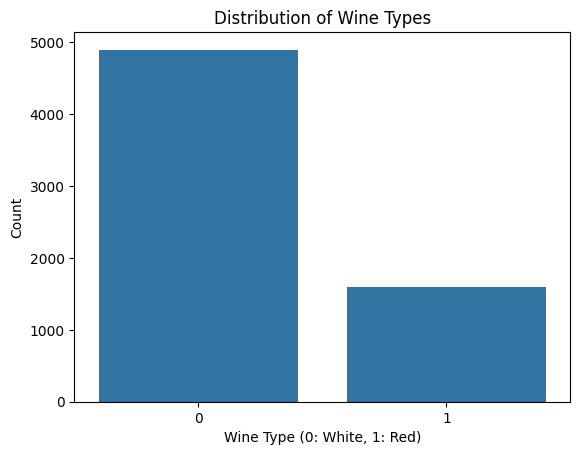

In [ ]:
#Visualize the univariate distribution of the target feature and each of the three explanatory variables
#that you think are likely to have a relationship with the target feature.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the winetype
sns.countplot(x='winetype', data=combined_df)

# Set the title and labels
plt.title('Distribution of Wine Types')
plt.xlabel('Wine Type (0: White, 1: Red)')
plt.ylabel('Count')

# Show the plot
plt.show()


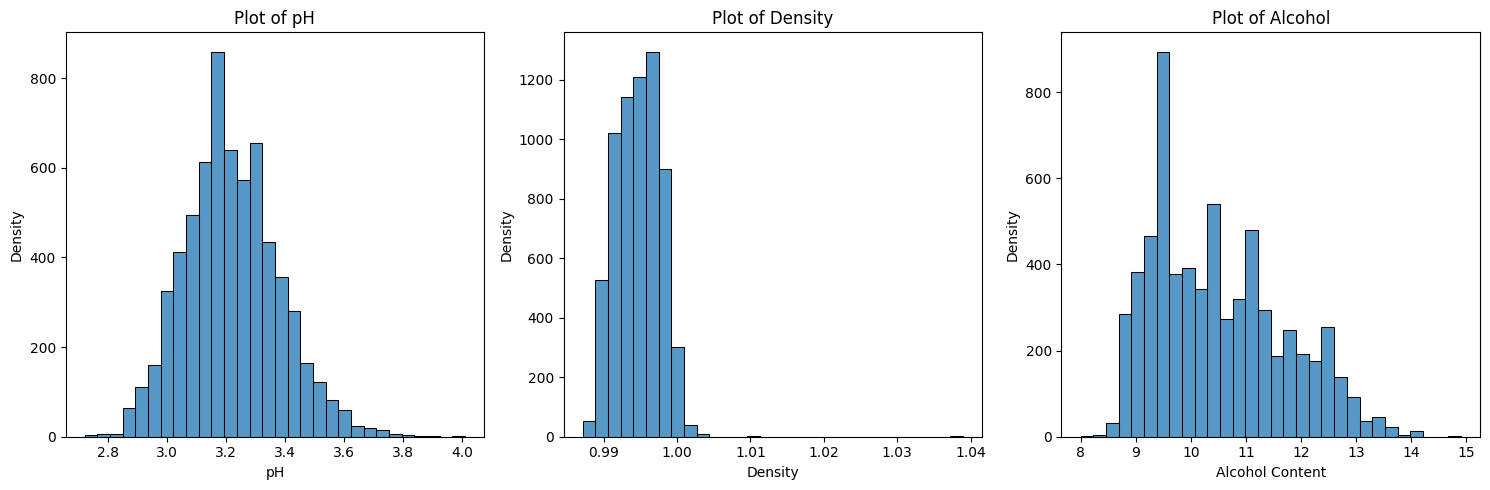

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create plots for pH, density, and alcohol
plt.figure(figsize=(15, 5))

# pH
plt.subplot(1, 3, 1)
sns.histplot(combined_df['pH'], bins=30)
plt.title('Plot of pH')
plt.xlabel('pH')
plt.ylabel('Density')

# Density
plt.subplot(1, 3, 2)
sns.histplot(combined_df['density'], bins=30)
plt.title('Plot of Density')
plt.xlabel('Density')
plt.ylabel('Density')

# Alcohol
plt.subplot(1, 3, 3)
sns.histplot(combined_df['alcohol'], bins=30)
plt.title('Plot of Alcohol')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')

plt.tight_layout()
plt.show()








In [ ]:
#Split data into training and test sets. Build models that evaluate the relationship between all available
#quantitative X variables in the dataset and the target variable.
#Evaluate Logistic Regression, Penalized Logistic Regression, and KNN (for classification) using cross-validation.
#How different are the results?

from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Identify features and target variable
X2 = combined_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'density', 'pH', 'sulphates', 'alcohol', ]]
y2 = combined_df['winetype']  # Replace with your actual target variable

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

# Create an instance of the KNN classifier
knn_2 = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors as needed

# Fit the model to the training data
knn_2.fit(X2_train, y2_train)

# Make predictions on the test data
y2_pred = knn_2.predict(X2_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y2_test, y2_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Get training and test scores (R^2 values)
train_score = knn_2.score(X2_train, y2_train)
test_score = knn_2.score(X2_test, y2_test)
print(f'Training Score (R^2): {train_score:.2f}')
print(f'Test Score (R^2): {test_score:.2f}')
mean(cross_val_score(knn_2, X2_train, y2_train, cv=kfold))


Mean Squared Error: 0.06
Training Score (R^2): 0.97
Test Score (R^2): 0.94


0.9400697098931186

In [ ]:
# Set up training and test data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

# random_state ensures same data will be generated for example each time
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

# Set penalty to none since we are starting with non penalized logit, L1 and L2 are other options
logreg = LogisticRegression(penalty= None, max_iter = 5000).fit(X2_train, y2_train)

print("logreg.coef_: {}".format(logreg.coef_))
print("Training set score: {:.3f}".format(logreg.score(X2_train, y2_train)))
print("Test set score: {:.3f}".format(logreg.score(X2_test, y2_test)))

predicted_vals = logreg.predict(X2_test) # predictions for y
print("logreg.predict: {}".format(predicted_vals))
cv_scores = cross_val_score(logreg, X2, y2, cv=10)  # 10-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores):.2f}')

logreg.coef_: [[  1.50584995  12.80113756  -0.74295485  -0.09083548  32.49136079
    0.06553043  -0.07173901 -21.66672189   9.8486807    8.95479834
   -0.40516147]]
Training set score: 0.989
Test set score: 0.987
logreg.predict: [0 0 0 ... 0 0 1]
Cross-Validation Scores: [0.98       0.98153846 0.99230769 0.98923077 0.99076923 0.99538462
 0.99076923 0.98305085 0.99383667 0.97842835]
Mean Cross-Validation Score: 0.99


In [ ]:
# SMALLER C will constrain Betas MORE (opposite of ridge/lasso regression).  It's a tuning parameter we can find using gridsearch.
# Note: L2 will shrink coefficients down, never reaching 0. L1 has potential to zero out coefficients

# C=100, compare coefs to regular model above.
logreg_pen = LogisticRegression(C=5000, penalty='l2').fit(X2_train, y2_train)

print("logreg .coef_: {}".format(logreg_pen.coef_))

print("Training set score: {:.3f}".format(logreg_pen.score(X2_train, y2_train)))
print("Test set score: {:.3f}".format(logreg_pen.score(X2_test, y2_test)))

predicted_vals = logreg_pen.predict(X2_test) # y_pred includes your predictions
print("logreg.predict: {}".format(predicted_vals))
cv_scores = cross_val_score(logreg, X2, y2, cv=10)  # 10-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores):.2f}')

logreg .coef_: [[ 0.83186572 14.15746789 -2.81196005 -0.27262406  2.27441385  0.06697812
  -0.07543865 -2.92010504  1.16583797 10.84658149 -0.92099771]]
Training set score: 0.981
Test set score: 0.978

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



logreg.predict: [0 0 0 ... 0 0 1]
Cross-Validation Scores: [0.98       0.98153846 0.99230769 0.98923077 0.99076923 0.99538462
 0.99076923 0.98305085 0.99383667 0.97842835]
Mean Cross-Validation Score: 0.99


Let's compare the scores of each model:

KNN Classifier:

Training: 0.97
Test: 0.94
cross-val: 0.94

Logistical Regression:
Training: 0.989
Test: 0.987
cross-val: 0.99

Pen. Logistical Regression:
Training: 0.981
Test: 0.978
cross-val: 0.98

We see that the results for each model are not so different. However, the KNN model has the weakest test score at 0.94, while the Logistical Regression has the strongest score, nearing 0.99. It seems that adding penalties hurts the model's strength, as it drops the test score to 0.978 for the penalized model.

In [ ]:
#Try running your models from the previous question with and without StandardScaler. Does using StandardScaler help?

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe_5 = make_pipeline(StandardScaler(), knn_2)
pipe_5.fit(X2_train, y2_train)
pipe_5.score(X2_test, y2_test)

print(pipe_5.fit(X2_train, y2_train))
print(pipe_5.score(X2_train, y2_train))
print("KFold:\n{}".format(
mean(cross_val_score(pipe_5, X2_train, y2_train, cv=kfold))))




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])
0.9961001642036125
KFold:
0.992610119517717


In [ ]:
pipe_6 = make_pipeline(StandardScaler(), LogisticRegression())
pipe_6.fit(X2_train, y2_train)
pipe_6.score(X2_test, y2_test)

logreg = pipe_6.named_steps['logisticregression']  # Access the Logistic Regression step in the pipeline
print("logreg.coef_: {}".format(logreg.coef_))
print(pipe_6.fit(X2_train, y2_train))
print(pipe_6.score(X2_train, y2_train))
print(np.mean(cross_val_score(pipe_6, X2_train, y2_train, cv=10, scoring="r2")))

logreg.coef_: [[ 0.36965025  1.24995518 -0.36331654 -3.53152809  0.80085066  0.97666379
  -2.94393662  3.46615117  0.34126951  0.67653644  1.25650269]]
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])
0.993431855500821
0.9626691820724445


In [ ]:
pipe_7 = make_pipeline(StandardScaler(), LogisticRegression(C=5000, penalty='l2'))
pipe_7.fit(X2_train, y2_train)
pipe_7.score(X2_test, y2_test)

logreg = pipe_7.named_steps['logisticregression']  # Access the Logistic Regression step in the pipeline
print("logreg.coef_: {}".format(logreg.coef_))
print(pipe_7.fit(X2\_train, y2_train))
print(pipe_7.score(X2_train, y2_train))
print(np.mean(cross_val_score(pipe_7, X2_train, y2_train, cv=10, scoring="r2")))

logreg.coef_: [[-0.35657498  1.12751256 -0.44965057 -5.58466841  0.77308888  1.43581891
  -3.33210781  5.63683754 -0.23040925  0.4888732   2.35565286]]
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=5000))])
0.9938423645320197
0.9637688523971519


After adding standard scaler, the scores of each model are:

KNN:
test: 0.996
cross-val: 0.963

Logistical Regression:
test: 0.993
cross-val: 0.963

Pen. Logistical Regression:
test: 0.994
cross-val: 0.964

If we compare these results to the previous models, we see that using standard scaler improves the test scores of all the models by a small amount.


In [ ]:
#Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

param_grid = {'kneighborsclassifier__n_neighbors': range(1, 10)}
grid = GridSearchCV(pipe_5, param_grid, cv=10)
grid.fit(X2_train, y2_train)
print(grid.best_params_)
print(grid.score(X2_test, y2_test))
print("KFold:\n{}".format(
mean(cross_val_score(grid, X2_train, y2_train, cv=kfold))))

{'kneighborsclassifier__n_neighbors': 2}
0.9938461538461538
KFold:
0.9915846890959827


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np


# Set up the parameter grid for GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 5000], 'penalty': [None]}

# Create the GridSearchCV object with Logistic Regression
grid = GridSearchCV(LogisticRegression(), param_grid, cv=10)

# Fit the model using GridSearchCV
grid.fit(X2_train, y2_train)

# Print the best parameters and coefficients
print("Best parameters:", grid.best_params_)
print("Best logistic regression coefficients:", grid.best_estimator_.coef_)

# Print the training and test scores using the best model found
print("Training set score: {:.3f}".format(grid.score(X2_train, y2_train)))
print("Test set score: {:.3f}".format(grid.score(X2_test, y2_test)))

# Predict using the best estimator found
predicted_vals = grid.predict(X2_test)
print("Predicted values:", predicted_vals)

# Calculate cross-validation scores using the best estimator
cv_scores = cross_val_score(grid.best_estimator_, X2_train, y2_train, cv=10)  # 10-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores):.2f}')

#test score found to be 0.978 and cross-val to be 0.98

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

Best parameters: {'C': 0.01, 'penalty': None}
Best logistic regression coefficients: [[ 0.6520056  15.05456175 -2.30823538 -0.16609745  2.82009819  0.07795525
  -0.08587586 -3.54926487  2.19211138 12.15161083 -1.07352947]]
Training set score: 0.982
Test set score: 0.978
Predicted values: [0 0 0 ... 0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.

Cross-Validation Scores: [0.97745902 0.99385246 0.97125257 0.97741273 0.97330595 0.98562628
 0.97741273 0.98767967 0.98151951 0.97741273]
Mean Cross-Validation Score: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Set up the parameter grid for GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 5000], 'penalty': ['l2']}

# Create the GridSearchCV object with Logistic Regression
grid = GridSearchCV(LogisticRegression(), param_grid, cv=10)

# Fit the model using GridSearchCV
grid.fit(X2_train, y2_train)

# Print the best parameters and coefficients
print("Best parameters:", grid.best_params_)
print("Best logistic regression coefficients:", grid.best_estimator_.coef_)

# Print the training and test scores using the best model found
print("Training set score: {:.3f}".format(grid.score(X2_train, y2_train)))
print("Test set score: {:.3f}".format(grid.score(X2_test, y2_test)))

# Predict using the best estimator found
predicted_vals = grid.predict(X2_test)
print("Predicted values:", predicted_vals)

# Calculate cross-validation scores using the best estimator
cv_scores = cross_val_score(grid.best_estimator_, X2_train, y2_train, cv=10)  # 10-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores):.2f}')

#test score is 0.979 and cross-val score is 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters: {'C': 10, 'penalty': 'l2'}
Best logistic regression coefficients: [[ 0.67775917 13.80851017 -0.73513968 -0.12964784  3.31951913  0.07746016
  -0.07942163 -4.43560278  2.42978434 12.28706303 -1.05363565]]
Training set score: 0.983
Test set score: 0.979
Predicted values: [0 0 0 ... 0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.97745902 0.99385246 0.97330595 0.97946612 0.96919918 0.9835729
 0.98767967 0.98973306 0.98151951 0.98562628]
Mean Cross-Validation Score: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We find surprisingly that gridsearch actually makes all the models less accurate in their predictions, driving the test and cross-validation scores down. However, it does increase the cross-validation scores.

Logistical Regression Coefficients (StandardScaler):
[ 0.36965025  1.24995518 -0.36331654 -3.53152809  0.80085066  0.97666379
  -2.94393662  3.46615117  0.34126951  0.67653644  1.25650269]]

Pen. Logistical Regression Coefficients (StandardScaler):
[-0.35657498  1.12751256 -0.44965057 -5.58466841  0.77308888  1.43581891
  -3.33210781  5.63683754 -0.23040925  0.4888732   2.35565286]

By comparing the coefficients for both models. we see that the models agree mostly, but do disagree to some extent on the importance of features 4, 6, 7, 8, and 11.

The final model that we would choose would be the KNN model with standard scaler because it has the highest test score at 0.996 and a high cross-validation score as well at 0.993. The other models come close however, such as the Logistic Regression with standard scaler and the penalized model. So there's a degree of flexibility in model selection in this case.

However, the KNN model does have the best scores, so I would choose this model. I would not implement gridsearch or remove standard scaler because that hurts the model's predictive power.

Ignore this line, pdf cuts off explanations##########################
######################################
#######################################
####################################
########################################
######################################
#######################################
####################################
#############################################################################
#######################################
####################################
#############################################################################
#######################################
####################################
#############################################################################
#######################################
####################################
#############################################################################
#######################################
####################################
#############################################################################
#######################################
####################################
#######################################



.